In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [2]:
ad_predict = pd.read_csv(r"C:\Users\prathmesh\OneDrive\Desktop\Codes\Practice\ML\Admission prediction\Admission_Predict.csv")
ad_predict_vr1 = pd.read_csv(r"C:\Users\prathmesh\OneDrive\Desktop\Codes\Practice\ML\Admission prediction\Admission_Predict_Ver1.1.csv")

In [3]:
ad_predict.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [4]:
ad_predict_vr1.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [5]:
ad_predict.isnull()

Serial No.  GRE Score  TOEFL Score  University Rating    SOP   LOR   \
0         False      False        False              False  False  False   
1         False      False        False              False  False  False   
2         False      False        False              False  False  False   
3         False      False        False              False  False  False   
4         False      False        False              False  False  False   
..          ...        ...          ...                ...    ...    ...   
395       False      False        False              False  False  False   
396       False      False        False              False  False  False   
397       False      False        False              False  False  False   
398       False      False        False              False  False  False   
399       False      False        False              False  False  False   

      CGPA  Research  Chance of Admit   
0    False     False             False  
1    False     False             False  
2    False     False             False  
3    False     False             False  
4    False     False             False  
..     ...       ...               ...  
395  False     False             False  
396  False     False             False  
397  False     False             False  
398  False     False             False  
399  False     False             False  

[400 rows x 9 columns]

In [6]:
np.where(ad_predict.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [7]:
ad_predict.shape

(400, 9)

In [8]:
ad_predict.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
ad_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
ad_predict.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [11]:
ad_predict['Chance of Admit '] = [1 if each > 0.75 else 0 for each in ad_predict['Chance of Admit ']]

In [12]:
ad_predict.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1                 1  
1         1                 1  
2         1                 0  
3         1                 1  
4         0                 0

In [13]:
ad_predict = ad_predict.drop('Serial No.', axis=1)

In [14]:
ad_predict.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0                 1  
1                 1  
2                 0  
3                 1  
4                 0

In [15]:
x = ad_predict[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']] 
y = ad_predict['Chance of Admit '] 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y , random_state=104,  test_size=0.25,  shuffle=True) 

In [17]:
x_train.shape

(300, 7)

In [18]:
x_test.shape

(100, 7)

In [19]:
y_train.shape

(300,)

In [20]:
y_test.shape

(100,)

In [21]:
model = DecisionTreeRegressor(random_state=1)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [22]:
pred

array([0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.])

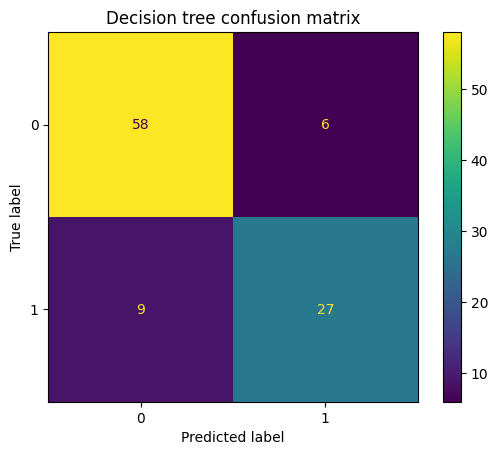

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('Decision tree confusion matrix')
plt.show()

In [24]:
acc = accuracy_score(y_test, pred)
acc

0.85

In [25]:
clf_report = classification_report(y_test, pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        64
           1       0.82      0.75      0.78        36

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.85      0.85      0.85       100

